# Cyber Crime Science Data Analysis and Visualization Project

## Analysis



### Libraries and Data import 

In [27]:
import pandas as pd

df_source = "data/save/merged_data.csv"

df = pd.read_csv(df_source)

In [28]:
display(df)

,Regio's,Online criminaliteit/Totaal slachtoffers (%),Online oplichting en fraude/Totaal slachtoffers (%),Online oplichting en fraude/Aankoopfraude/Totaal slachtoffers (%),Online oplichting en fraude/Verkoopfraude/Totaal slachtoffers (%),Online oplichting en fraude/Fraude betalingsverkeer/Totaal slachtoffers (%),Online oplichting en fraude/Identiteitsfraude/Totaal slachtoffers (%),Online oplichting en fraude/Phishing/Totaal slachtoffers (%),Hacken/Totaal slachtoffers (%),Hacken/Apparaat/Totaal slachtoffers (%),...,HighRiskShare,Bbp (marktprijzen) (mln euro),Bbp per inwoner (euro),"Bbp, volumemutaties (%)","Bruto toegevoegde waarde, volumemutaties (%)","Toegevoegde waarde (bruto, basisprijzen) (mln euro)",Meer dan basisvaardigheden,Basisvaardigheden,Geringe/geen digitale vaardigheden,Kan niet vastgeteld worden
0,Groningen (PV),16.3,8.6,6.5,1.4,1.0,0.6,1.0,6.3,2.7,...,18.563724,32566,55332,"1,7","2,1",29211,"43,8","35,1","17,8","3,3"
1,Fryslân (PV),14.2,8.5,6.7,1.3,0.8,0.6,0.6,5.0,2.3,...,16.081363,25490,39052,"3,5",4,22864,"44,3","33,9","14,8","7,0"
2,Drenthe (PV),14.8,8.8,6.6,1.7,1.4,0.6,1.0,5.9,2.8,...,18.672477,18434,37146,"2,8","3,2",16535,"44,9","29,1","21,6","4,4"
3,Overijssel (PV),14.8,9.0,6.8,1.3,0.8,0.6,0.6,5.4,2.3,...,19.470765,53172,45476,"3,8","4,2",47694,"47,9","28,4","20,9","2,8"
4,Flevoland (PV),16.9,10.1,7.6,1.7,1.0,0.8,0.9,5.5,2.8,...,20.733450,17303,40100,"4,3","4,8",15521,"55,0","26,1","17,4",.
5,Gelderland (PV),14.7,8.4,6.3,1.2,0.8,0.6,0.7,5.3,2.2,...,20.371861,95416,45360,"3,8","4,3",85586,"46,4","30,7","19,8","3,0"
6,Utrecht (PV),15.0,9.0,6.7,1.4,1.2,0.8,0.7,5.4,2.1,...,22.358339,88660,64928,4,"4,5",79527,"57,6","26,7","13,7","2,0"
7,Noord-Holland (PV),16.9,10.0,7.5,1.5,1.3,0.7,0.9,5.8,2.4,...,19.573005,203766,70285,"6,7","7,2",182774,"53,6","28,7","15,9","1,8"
8,Zuid-Holland (PV),15.8,9.5,6.9,1.4,1.1,0.8,0.9,5.5,2.3,...,19.231222,200451,53597,"3,5",4,179802,"51,5","27,2","18,3","2,9"
9,Zeeland (PV),15.8,9.8,7.4,1.8,0.9,0.7,1.0,5.5,2.4,...,17.124105,17839,46205,"4,7","5,2",16001,"39,9","28,3","28,7","3,1"


In [29]:
weights = {
    'Basisonderwijs (%)': 1,
    'Vmbo/Havo/Vwo/Mbo1 (%)': 2,
    'Havo/Vwo/Mbo2-4 (%)': 3,
    'Hbo/Wo-bachelor (%)': 4,
    'Hbo/Wo-master/Doctor (%)': 5
}

# Calculate weighted average education score for each province
df['Weighted education score'] = sum(
    df[col] * weight for col, weight in weights.items()
) / df[list(weights.keys())].sum(axis=1)


display(df[['Regio\'s', 'Weighted education score']])

#Drop the education columns
df = df.drop(columns=list(weights.keys()))

,Regio's,Weighted education score
0,Groningen (PV),3.113000
1,Fryslân (PV),2.978000
2,Drenthe (PV),2.982018
3,Overijssel (PV),3.028000
4,Flevoland (PV),2.990991
5,Gelderland (PV),3.074000
6,Utrecht (PV),3.300300
7,Noord-Holland (PV),3.227000
8,Zuid-Holland (PV),3.082917
9,Zeeland (PV),2.932068


In [34]:
target = 'Online oplichting en fraude/Phishing/Totaal slachtoffers (%)'
features = [
    'Weighted education score',
    'Bbp per inwoner (euro)', 'Bevolkingsdichtheid (aantal inwoners per km²)',
    'HighRiskShare', 'Meer dan basisvaardigheden', 'Basisvaardigheden',
    'Geringe/geen digitale vaardigheden',
    'Online criminaliteit/Totaal slachtoffers (%)',
    'Online oplichting en fraude/Totaal slachtoffers (%)',
    'Hacken/Totaal slachtoffers (%)',
    'Online bedreiging en intimidatie/Totaal slachtoffers (%)',
    'Overige online delicten/Totaal slachtoffers (%)'
]


In [35]:
for col in features + [target]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

correlations = df[features + [target]].corr()[target].sort_values(ascending=False)
print(correlations)

Online oplichting en fraude/Phishing/Totaal slachtoffers (%)    1.000000
Online criminaliteit/Totaal slachtoffers (%)                    0.640387
Hacken/Totaal slachtoffers (%)                                  0.599989
Online oplichting en fraude/Totaal slachtoffers (%)             0.456322
Overige online delicten/Totaal slachtoffers (%)                 0.416812
Geringe/geen digitale vaardigheden                              0.341851
Online bedreiging en intimidatie/Totaal slachtoffers (%)        0.228488
Bbp per inwoner (euro)                                          0.101143
Bevolkingsdichtheid (aantal inwoners per km²)                   0.010943
Basisvaardigheden                                              -0.084430
Weighted education score                                       -0.118400
HighRiskShare                                                  -0.139360
Meer dan basisvaardigheden                                     -0.146456
Name: Online oplichting en fraude/Phishing/Totaal s

In [39]:
from sklearn.linear_model import LinearRegression

X = df[features].values
y = df[target].values

model = LinearRegression()
model.fit(X, y)

for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef}")

Weighted education score: -0.04863190603495135
Bbp per inwoner (euro): -9.746417497838099e-06
Bevolkingsdichtheid (aantal inwoners per km²): 0.00044715223942757524
HighRiskShare: -0.008771104628024464
Meer dan basisvaardigheden: -0.008732032036537045
Basisvaardigheden: 0.11255255847454804
Geringe/geen digitale vaardigheden: -0.049324740272701076
Online criminaliteit/Totaal slachtoffers (%): 0.2534223111040864
Online oplichting en fraude/Totaal slachtoffers (%): 0.00813437355443186
Hacken/Totaal slachtoffers (%): 0.6299457323322002
Online bedreiging en intimidatie/Totaal slachtoffers (%): -1.5664074187526293
Overige online delicten/Totaal slachtoffers (%): 0.9656122933160953


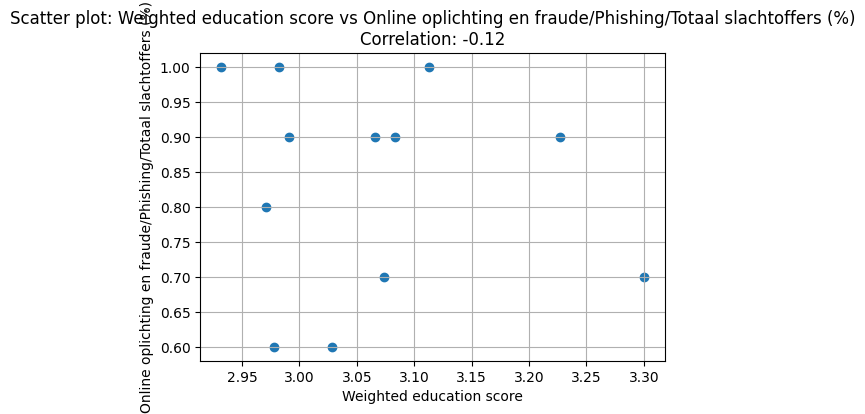

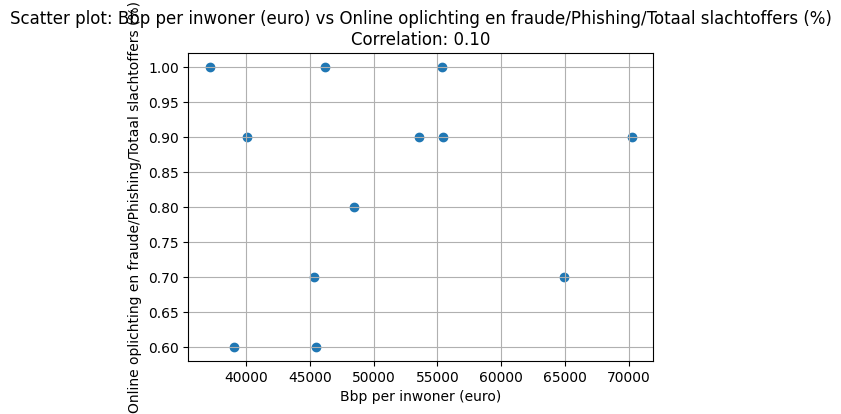

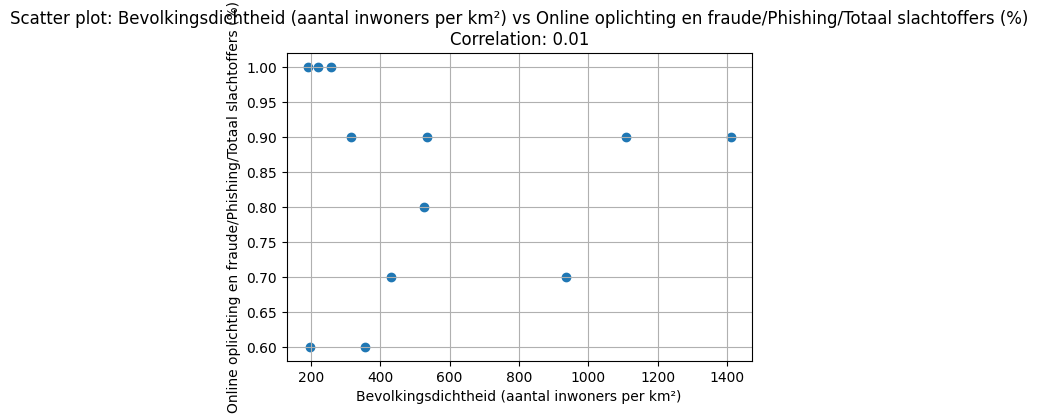

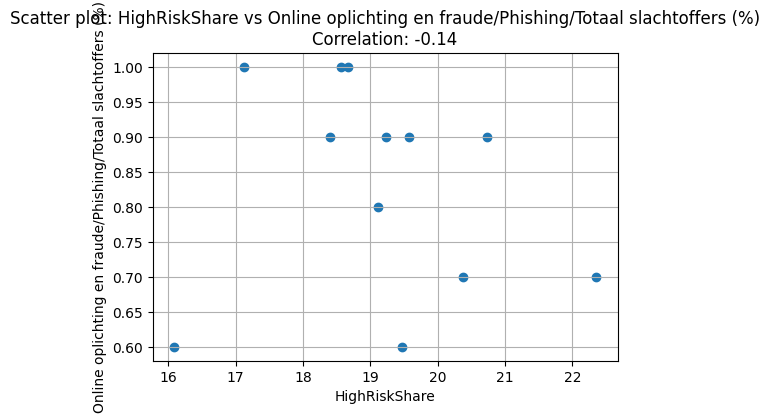

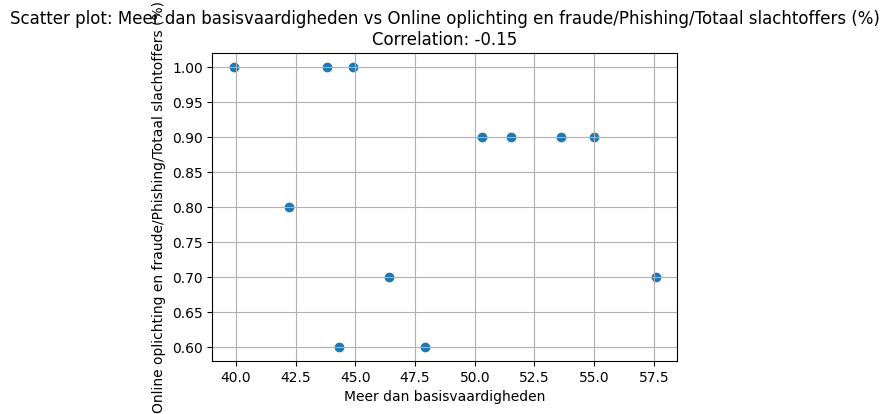

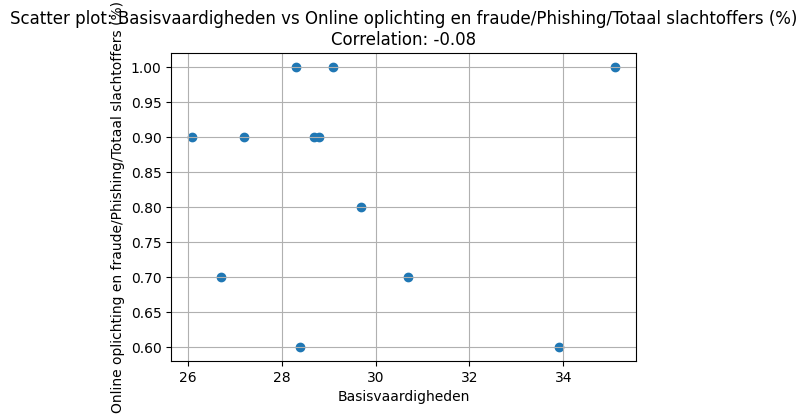

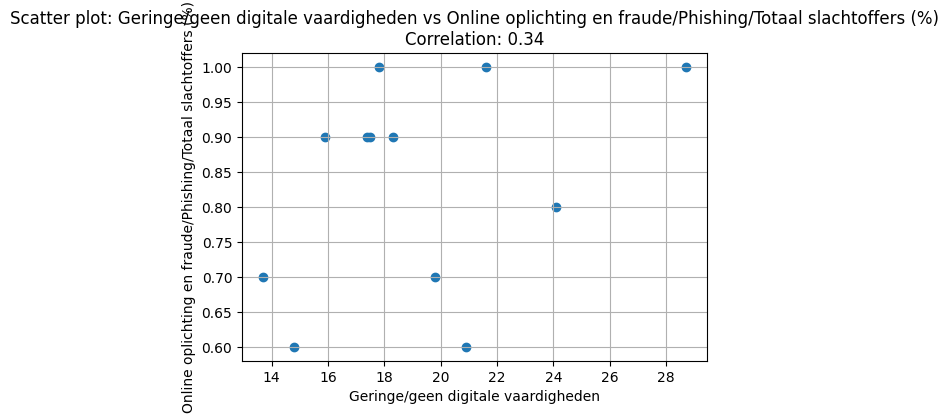

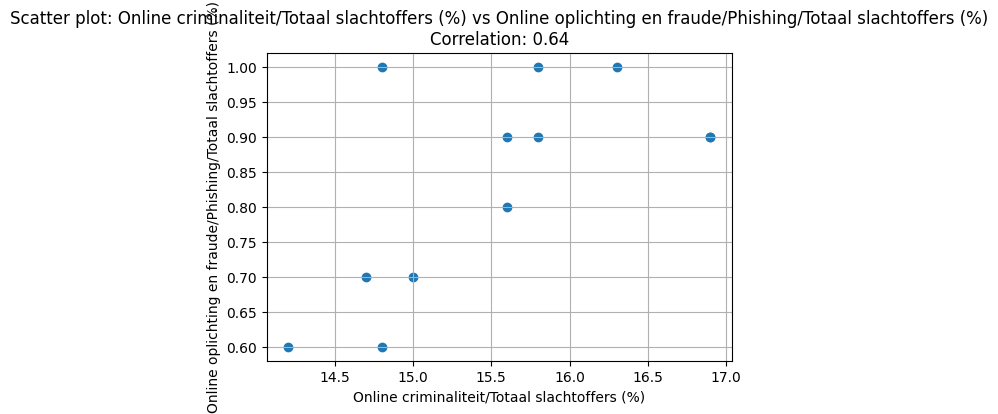

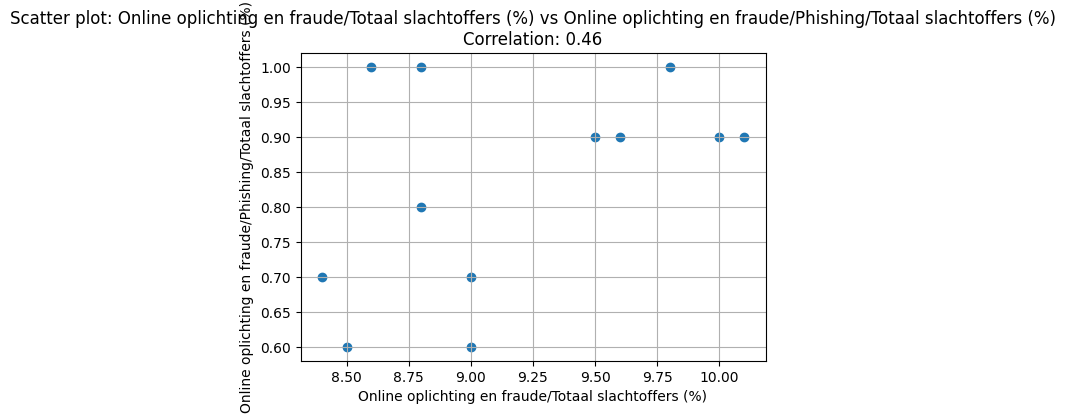

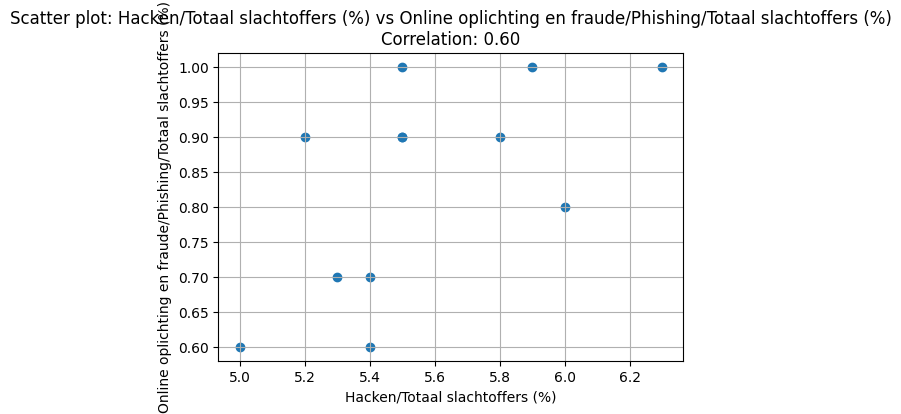

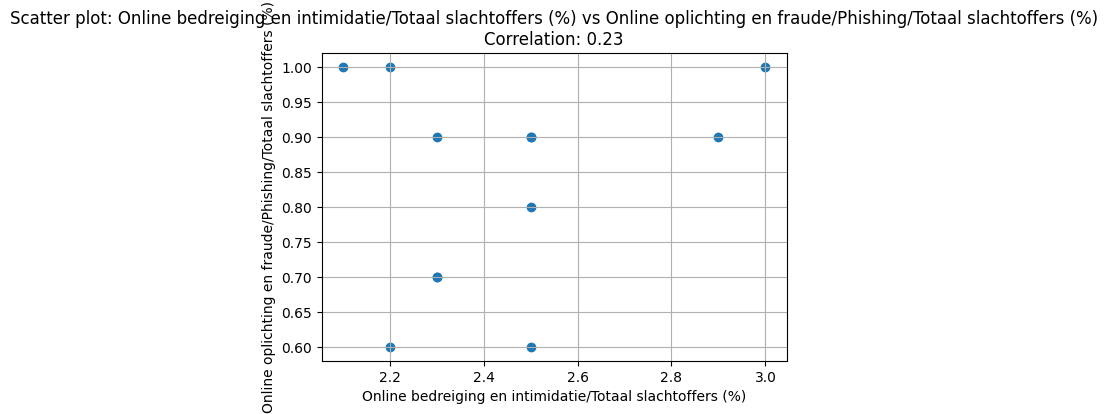

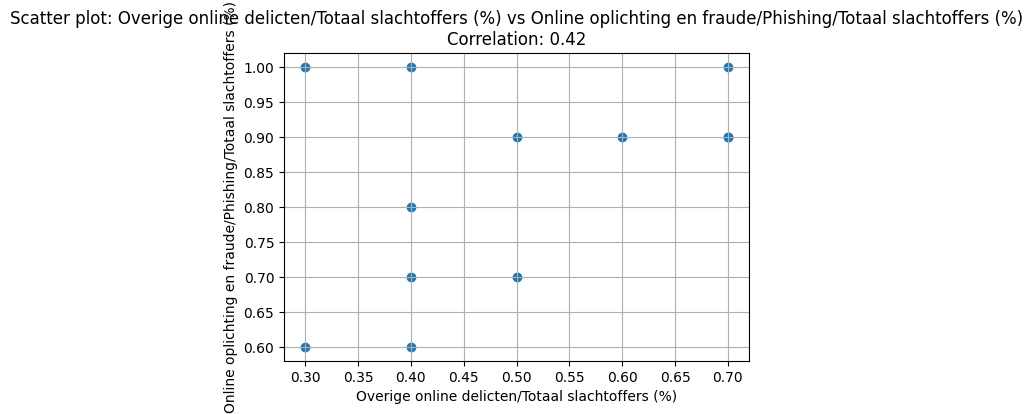

In [38]:
import matplotlib.pyplot as plt

for feature in features:
    corr = df[[feature, target]].corr().iloc[0, 1]
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Scatter plot: {feature} vs {target}\nCorrelation: {corr:.2f}')
    plt.grid(True)
    plt.show()